In [1]:
#Predicting Survival in the Titanic Data Set using descision tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploratory Data Analysis

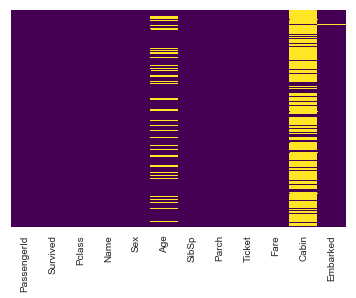

In [39]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

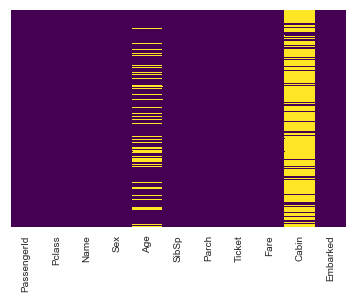

In [40]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

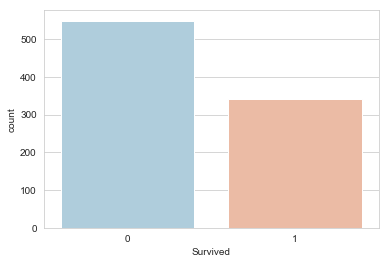

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

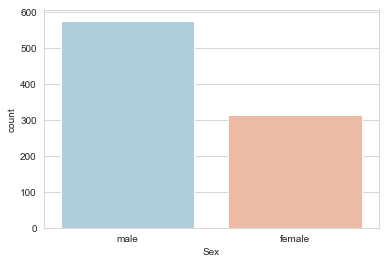

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=train,palette='RdBu_r')

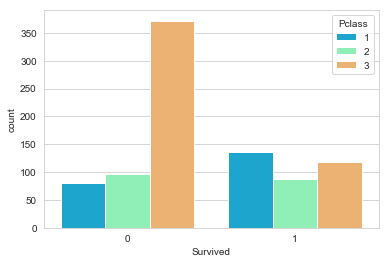

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

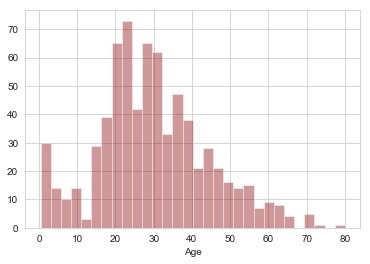

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

In [10]:
## Data Cleaning filling Null values


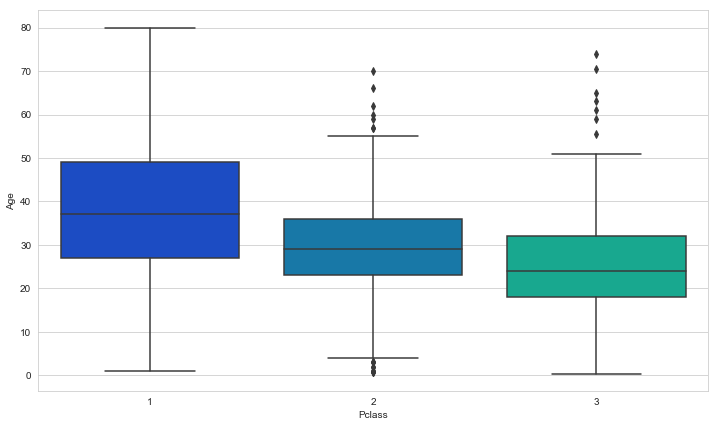

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [14]:
## Using mean ages across pclass 

In [22]:
train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [42]:
test.groupby(['Pclass'])['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 39

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [43]:
def impute_Testage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 41

        elif Pclass == 2:
            return 29

        else:
            return 24


    else:
        return Age

In [24]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [44]:
test['Age'] = test[['Age','Pclass']].apply(impute_Testage,axis=1)

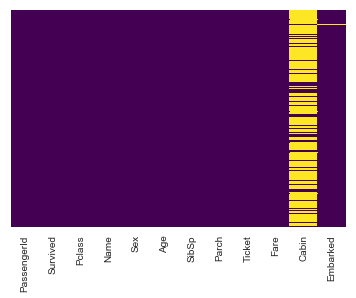

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [56]:
train.drop('Cabin',axis=1,inplace=True)

In [45]:
test.drop('Cabin',axis=1,inplace=True)

In [57]:
train.dropna(inplace=True)

In [46]:
test.dropna(inplace=True)

In [28]:
## Categorical Values

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [53]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [54]:
train = pd.concat([train,sex,embark],axis=1)

In [47]:
sex1 = pd.get_dummies(test['Sex'],drop_first=True)
embark1 = pd.get_dummies(test['Embarked'],drop_first=True)

In [48]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [49]:
test = pd.concat([test,sex1,embark1],axis=1)

In [36]:
## Doing Same for TEST Split



In [58]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [59]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
## Train and Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [60]:
X_train=train[['Pclass','Age','SibSp','Parch','Fare','Q','S']]

In [61]:
y_train=train[['Survived']]

In [62]:
X_test=test[['Pclass','Age','SibSp','Parch','Fare','Q','S']]

In [65]:
## Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [67]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [68]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
predictions=dtree.predict(X_test)

In [70]:
ypred=pd.DataFrame(data=predictions,columns=['Predicted'])
id = pd.DataFrame(data=X_test.index.values,columns=['ID'])
output=pd.concat([id,ypred],axis=1)
output.to_csv('MachineLearning_Session21.csv',index=False)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train, test_size=0.30, 
                                                    random_state=101)

In [73]:
dtree1=DecisionTreeClassifier(criterion='entropy')

In [74]:
dtree1.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
predictions=dtree1.predict(X_test1)

In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion=confusion_matrix(y_test1,predictions)

aacuracy_sc=accuracy_score(y_test1,predictions)

In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       123
           1       0.59      0.59      0.59        92

   micro avg       0.65      0.65      0.65       215
   macro avg       0.64      0.64      0.64       215
weighted avg       0.65      0.65      0.65       215



In [79]:
print("Accuracy: ",aacuracy_sc)
print("confusion: ",confusion)

Accuracy:  0.6511627906976745
confusion:  [[86 37]
 [38 54]]


In [81]:
from sklearn.model_selection import cross_val_score

In [83]:
score=cross_val_score(dtree,X_test1,y_test1,cv=10)

In [85]:
print("Cross Val Score: ",score.mean())

Cross Val Score:  0.6319875776397514
